In [1]:
import pandas as pd
data=pd.read_csv("insurance_mod.csv")

In [2]:
data.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.211668,30.671429,1.095737,13263.904802
std,14.054191,6.096768,1.205571,12112.194771
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4738.270000
50%,39.000000,30.400000,1.000000,9377.900000
75%,51.000000,34.700000,2.000000,16586.500000
max,64.000000,53.100000,5.000000,63770.430000


In [2]:
ma=data['age'].mean()
mb=data['bmi'].mean()
me=data['expenses'].mean()

In [3]:
junk = data[((data['age']<ma)&(data['smoker']=='no')&(data['children']<2)&(data['bmi']<=mb))&(data['expenses']>=me)]
junk

,age,sex,bmi,children,smoker,region,expenses
200,24,female,23.2,0,no,southeast,25081.77
224,28,female,24.3,1,no,northeast,23288.93
246,23,male,18.7,0,no,northwest,21595.38
249,18,female,30.1,0,no,northeast,21344.85
264,37,male,29.8,0,no,southwest,20420.60
266,29,male,29.6,1,no,northeast,20277.81
295,24,female,27.6,0,no,southwest,18955.22
318,32,female,23.7,1,no,southeast,17626.24
331,27,female,30.6,1,no,northeast,16796.41


In [4]:
data = data.drop(junk.index)

In [5]:
data

,age,sex,bmi,children,smoker,region,expenses
0,54,female,47.4,0,yes,southeast,63770.43
1,45,male,30.4,0,yes,southeast,62592.87
2,52,male,34.5,3,yes,northwest,60021.40
3,31,female,38.1,1,yes,northeast,58571.07
4,33,female,35.5,0,yes,northwest,55135.40
...,...,...,...,...,...,...,...
1332,18,male,34.1,0,no,southeast,1137.01
1333,18,male,33.7,0,no,southeast,1136.40
1334,18,male,33.3,0,no,southeast,1135.94
1335,18,male,30.1,0,no,southeast,1131.51


In [5]:
bad = data[((data['age']<ma)&(data['smoker']=='no')&(data['children']<2))&(data['expenses']>me)]
bad

,age,sex,bmi,children,smoker,region,expenses
176,20,male,35.3,1,no,southeast,27724.29
227,19,male,33.1,0,no,southwest,23082.96
277,28,male,33.8,0,no,northwest,19673.34
287,37,male,36.2,0,no,southeast,19214.71
294,30,male,38.8,1,no,southeast,18963.17
296,27,female,32.4,1,no,northeast,18903.49
309,25,female,32.2,1,no,southeast,18218.16
315,25,female,41.3,0,no,northeast,17878.90
334,21,male,31.0,0,no,southeast,16586.50
374,34,male,32.8,1,no,southwest,14358.36


In [6]:
data = data.drop(bad.index)

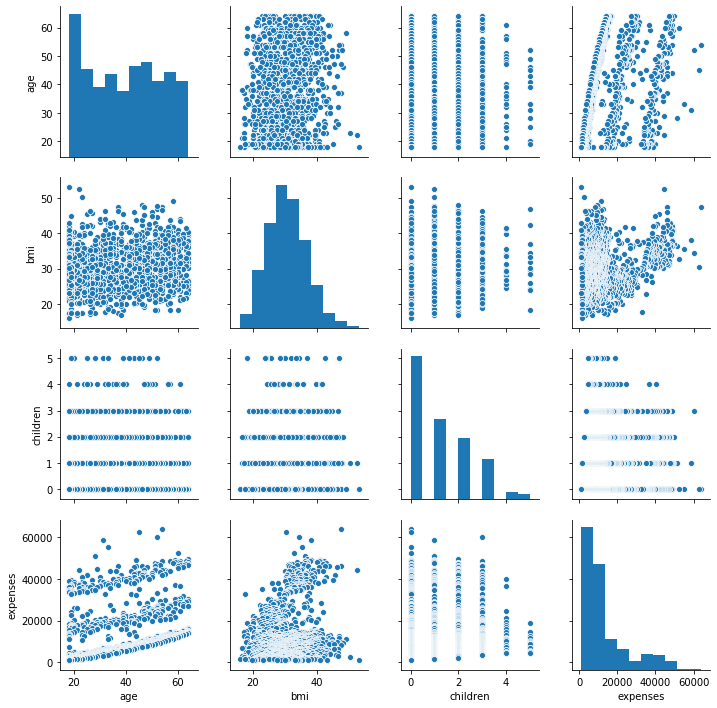

In [11]:
import seaborn as sns
sns.pairplot(data)

In [7]:
import numpy as np
data['expenses'] = np.log(data['expenses'])

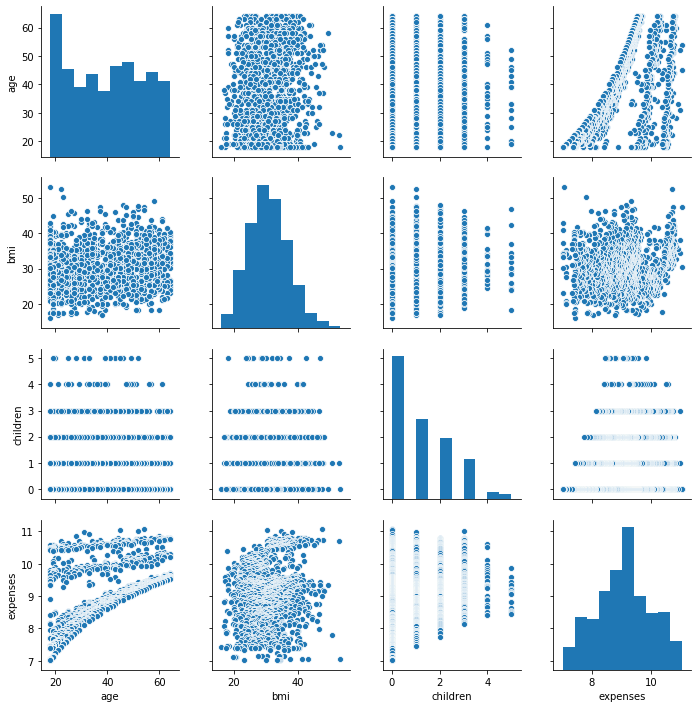

In [13]:
sns.pairplot(data)

In [9]:
data.describe()

,age,bmi,children,expenses
count,1317.000000,1317.000000,1317.000000,1317.000000
mean,39.407745,30.664313,1.105543,9.086184
std,14.052389,6.104768,1.210494,0.921238
min,18.000000,16.000000,0.000000,7.022752
25%,27.000000,26.300000,0.000000,8.452418
50%,40.000000,30.400000,1.000000,9.129701
75%,51.000000,34.700000,2.000000,9.668903
max,64.000000,53.100000,5.000000,11.063045


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

# smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

#region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [9]:
x = data.drop('expenses',axis=1)
y = data['expenses']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(
max_depth= 50,
min_samples_leaf= 10, 
min_samples_split= 7, 
n_estimators= 1200, 
random_state= 42)
model = model.fit(x_train, y_train)

In [12]:
from sklearn.metrics import r2_score

# Predicting R2 Score the Train set results
y_pred_rf_train = model.predict(x_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = model.predict(x_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)

R2_score (train):  0.9155842451519842
R2_score (test):  0.9423178579541557


In [ ]:
#Calculating error for all the values in the data and adding to a csv file

In [21]:
import numpy as np
data=pd.read_csv("res.csv")
expe = pd.read_csv("res.csv")

data=data.drop(['expenses'],axis=1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

predicts = []

for row in data.index:
    df=pd.DataFrame(data.iloc[row,:]).T
    pred = model.predict(df)
    predicts.append([np.exp(pred[0]),expe['expenses'][row]-np.exp(pred[0])])

In [23]:
res = pd.DataFrame(predicts,columns=['predict','error'])

,predict,error
0,47856.202707,15914.227293
1,39724.667059,22868.202941
2,46635.438952,13385.961048
3,42861.841013,15709.228987
4,40951.378513,14184.021487


In [28]:
res.describe()

,predict,error
count,1337.000000,1337.000000
mean,12630.187274,633.717528
std,11466.255364,4183.148758
min,1393.473305,-6474.190012
25%,4930.070050,-983.823572
50%,9345.544591,-336.539932
75%,14327.017868,100.656512
max,48060.280952,25965.141479


In [33]:
exp['predict']=res['predict']
exp['error']=res['error']

In [34]:
exp.head()

,age,bmi,children,expenses,region,sex,smoker,predict,error
0,54.0,47.4,0.0,63770.43,southeast,female,yes,47856.202707,15914.227293
1,45.0,30.4,0.0,62592.87,southeast,male,yes,39724.667059,22868.202941
2,52.0,34.5,3.0,60021.40,northwest,male,yes,46635.438952,13385.961048
3,31.0,38.1,1.0,58571.07,northeast,female,yes,42861.841013,15709.228987
4,33.0,35.5,0.0,55135.40,northwest,female,yes,40951.378513,14184.021487


In [35]:
exp.to_csv('model_op.csv')